# Homework 1. Exploratory Data Analysis, Prob2 GapMinder


Based on Harvard CS109.

All your submitted work should be your own.
---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
[Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [5]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import random
import math
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn import datasets, linear_model
import seaborn as sns

import requests

## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. Submit an Ipython notebook with your original solutions filled in.

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [6]:
#your code here
countries = pd.read_csv('https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv')
countries


,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
5,Burundi,AFRICA
6,Cameroon,AFRICA
7,Cape Verde,AFRICA
8,Central African Republic,AFRICA
9,Chad,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [7]:
#your code here
income = pd.read_excel('C:/Users/Shaq/Desktop/Income.xlsx')
income.head()


,Money,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [9]:
#your code here
incometrans = income.transpose()
incometrans.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
Money,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Vietnam,Virgin Islands (U.S.),North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan
1800,NaN,603,NaN,667,716,NaN,1197,618,NaN,757,...,861,NaN,NaN,NaN,877,NaN,663,869,NaN,507
1801,NaN,603,NaN,667,716,NaN,1199,620,NaN,757,...,861,NaN,NaN,NaN,879,NaN,665,870,NaN,507
1802,NaN,603,NaN,668,717,NaN,1201,623,NaN,757,...,861,NaN,NaN,NaN,882,NaN,667,871,NaN,507
1803,NaN,603,NaN,668,718,NaN,1204,626,NaN,757,...,861,NaN,NaN,NaN,884,NaN,668,872,NaN,507


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

In [10]:
income_2000 = DataFrame()
income_2000['Area'] = income['Money']
income_2000['GDP'] = income[2000]
income_2000.head()

,Area,GDP
0,Abkhazia,NaN
1,Afghanistan,962.0
2,Akrotiri and Dhekelia,NaN
3,Albania,5305.0
4,Algeria,9885.0


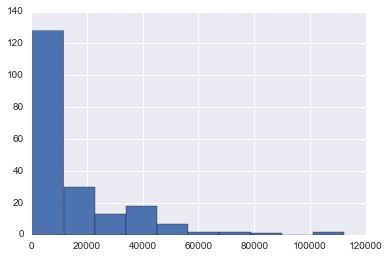

In [11]:
def plotDataFrameAtSpecificYear(column):
#     plt.hist(dfincome[column])
    income[column].hist()
plotDataFrameAtSpecificYear(2000)


In [12]:
values = income_2000.GDP.values
gdps = values


countriesNames = income_2000.Area

import operator

countries2gdps = dict()
for i in range(len(countriesNames)):
    countries2gdps[countriesNames[i]] = gdps[i]

countries2gdps = sorted(countries2gdps.items(), key=operator.itemgetter(1))

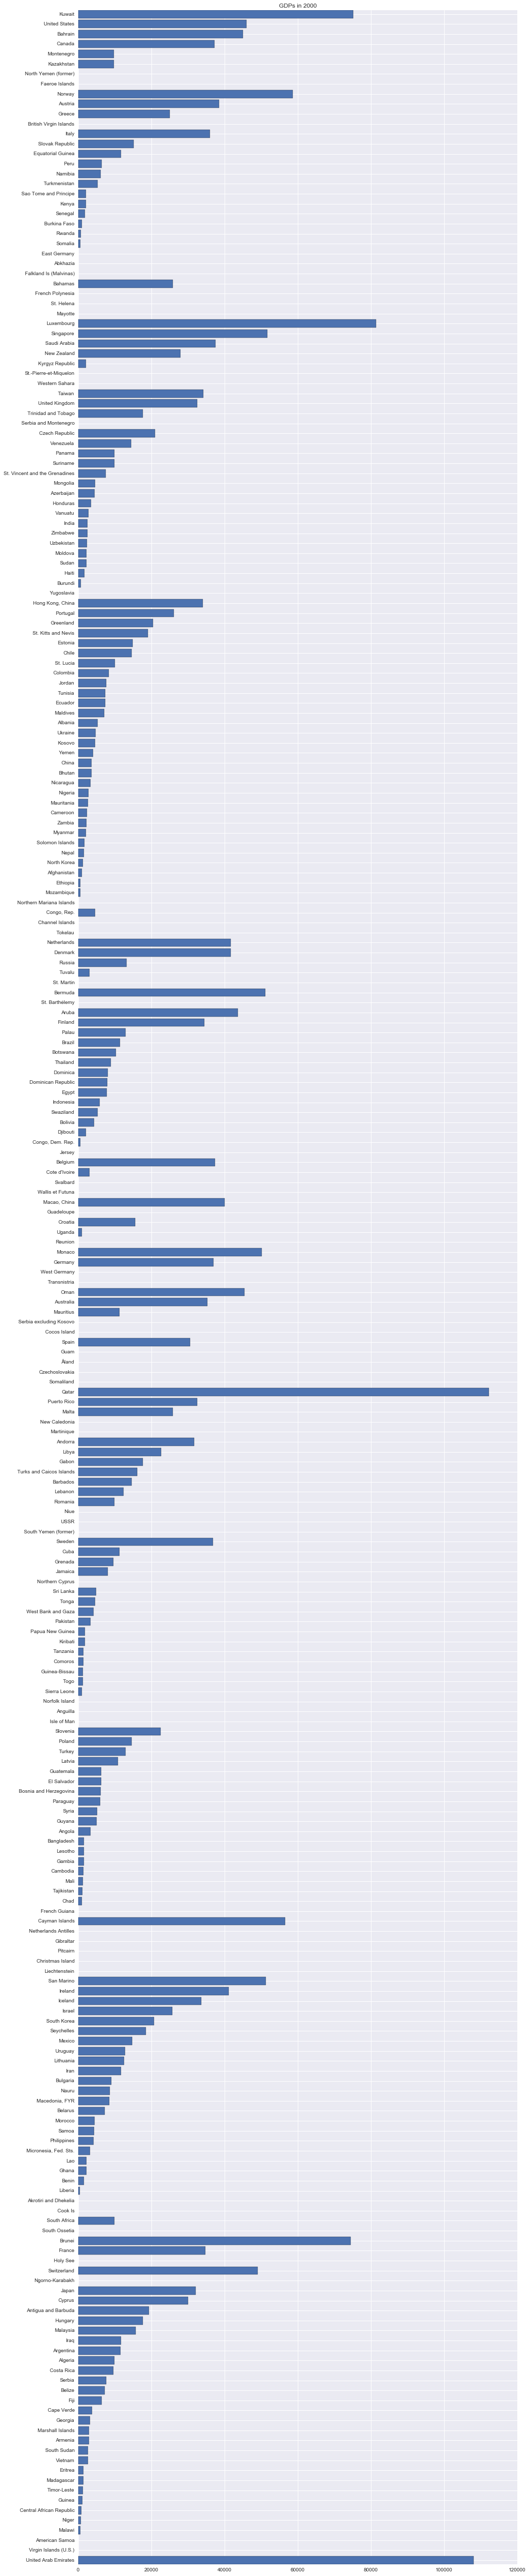

In [13]:
plt.figure(num=None, figsize=(16, 90), dpi=600, facecolor='w', edgecolor='k')
plt.yticks(range(len(countries2gdps)), [record[0] for record in countries2gdps])
plt.barh(range(len(countries2gdps)), [record[1] for record in countries2gdps], align='center')
plt.subplots_adjust(left=0.15)

plt.title('GDPs in 2000')
plt.gca().xaxis.grid(True)
plt.show()

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [32]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
def mergebyyear(year):
    income_year = DataFrame()
    join = DataFrame()
    income_year['Country'] = income['Money']
    income_year['Income'] = income[year]
    income_year = income_year.loc[:,['Country', 'Income']]  
    join = pd.merge(countries, income_year, on=['Country'], how='inner')
    return join
mergebyyear(2008)


,Country,Region,Income
0,Algeria,AFRICA,12314.0
1,Angola,AFRICA,7103.0
2,Benin,AFRICA,1646.0
3,Botswana,AFRICA,13858.0
4,Burundi,AFRICA,723.0
5,Cameroon,AFRICA,2571.0
6,Cape Verde,AFRICA,6031.0
7,Central African Republic,AFRICA,894.0
8,Chad,AFRICA,1753.0
9,Comoros,AFRICA,1440.0


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

KeyError: 176

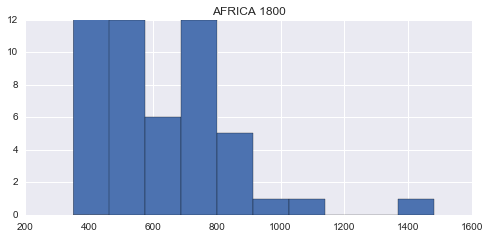

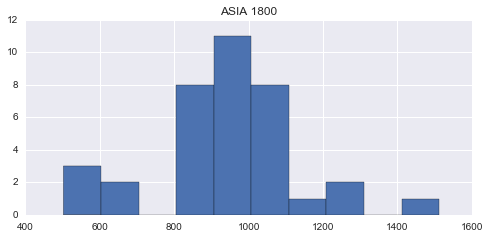

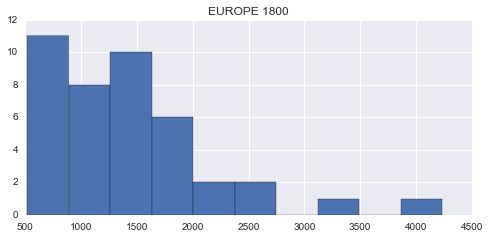

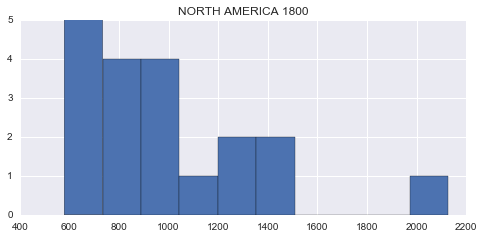

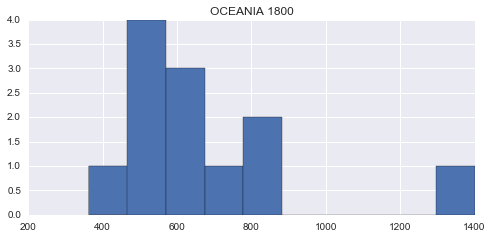

In [31]:
for i in range (1800,2010,4):
    income_year = mergebyyear(i)
    r = 'AFRICA'
    count = 0
    for j in range (0, 193):
        if income_year.Region[j] == r:
            #plt.figure()
            #plt.bar(dfincomebyyear.Income[j], 100, align='center', alpha=0.5)
            #dfincomebyyear['Income'].hist()
            count = count + 1
    
        else:
            plt.subplots(figsize =(8, 3.5))
            ax = plt.gca()
            ax.set_title(str(r) + " " + str(i))
            #plt.bar(dfincomebyyear.Income[j - count : j], len(dfincomebyyear.Income), align='center', alpha=0.5)
            income_year.Income[j - count : j].hist()
            count = 0
            r = income_year.Region[j]


C:\Users\Shaq\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


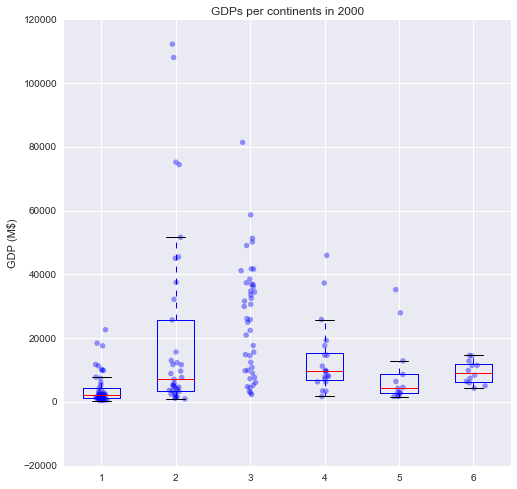

In [21]:
data_2000 = mergebyyear(2000)
regions = data_2000.loc[:,['Region']].drop_duplicates().values[:,0]


plt.figure(num=None, figsize=(8, 8), dpi=300, facecolor='w', edgecolor='k')

values_array = []
i = 1 #used for x-axis positioning
for region in regions:
    zone_entries = data_2000[data_2000.Region==region]
    values = zone_entries.loc[:,['Income']].values[:,0]
    values_array.append(values)
    x = np.random.normal(i, 0.04, size=len(values))
    plt.scatter(x, values, c='blue', s=30, alpha=0.4, edgecolors='none')   
    i = i+1
 
plt.gca().yaxis.grid(True)
plt.ylabel('GDP (M$)')
plt.xticks(range(len(regions)), regions)
plt.boxplot(values_array)
plt.title('GDPs per continents in 2000')
#plt.grid()
plt.show()

In [22]:
#your code here
data_year = mergebyyear(2000)
regions = list(data_year.loc[:,['Region']].drop_duplicates().values[:,0])
print (regions)

['AFRICA', 'ASIA', 'EUROPE', 'NORTH AMERICA', 'OCEANIA', 'SOUTH AMERICA']


In [23]:
def drawDgps(year):
    data_year = mergebyyear(year)
    regions = ['AFRICA', 'ASIA', 'EUROPE', 'NORTH AMERICA', 'OCEANIA', 'SOUTH AMERICA']
    incomes = []
    for region in regions:
        region_incomes = data_year[data_year.Region==region]['Income'].values
        incomes.append(region_incomes)     

    plt.figure(num=None, figsize=(8, 4), dpi=300, facecolor='w', edgecolor='k')
    plt.boxplot(incomes)
    
    plt.ylim(10**2, 10.5**5)
    plt.grid(True)   
    plt.xticks(range(1, len(regions)+1), regions, rotation='vertical') 
    plt.yscale('log')
    plt.title('GDPs per region in '+str(year))   
    plt.ylabel('GDP - log10(Million$)')
    plt.show()

C:\Users\Shaq\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


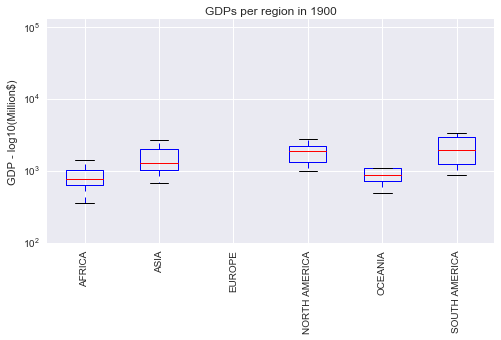

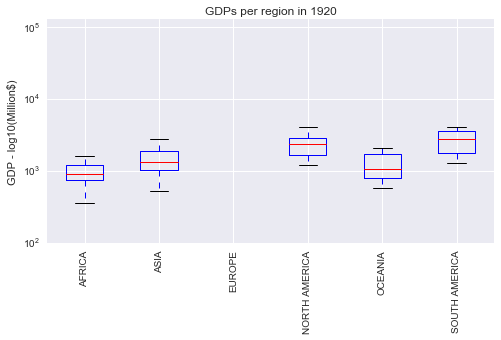

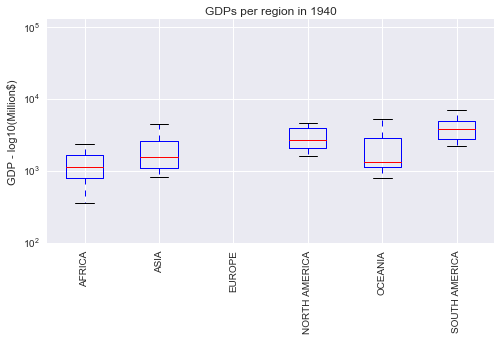

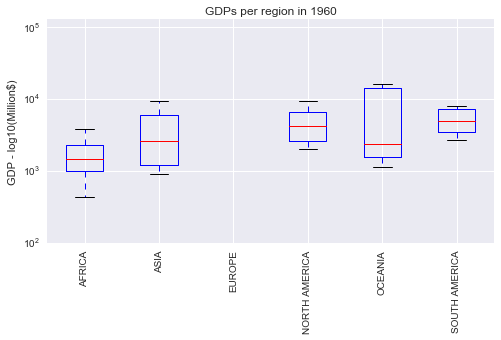

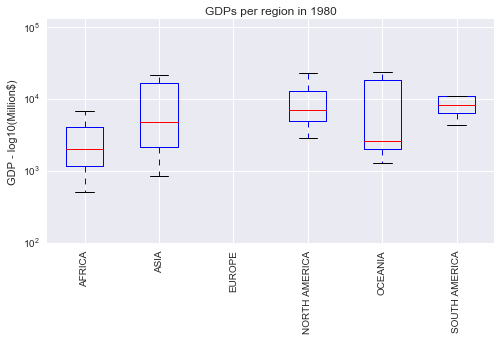

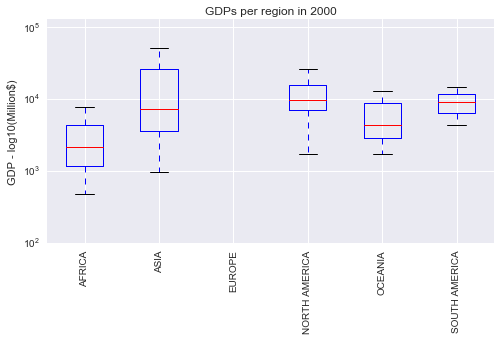

In [24]:
for year in np.arange(1900, 2010+10, 20):
    drawDgps(year)

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
*It seems that the gap between the Europe and North America and Africa has increased*